In [11]:
import time
import matplotlib.pyplot as plt
from coppeliasim_zmqremoteapi_client import RemoteAPIClient


# Configuração

Simulation time: 0.00 [s]
Pos:  [-1.2000000000000002, 0.325, 0.0]
Ori:  [-0.0, 0.0, -0.0]
Simulation time: 0.05 [s]
Pos:  [-1.2000000000000002, 0.325, 0.0]
Ori:  [-0.0, 0.0, -0.0]
Simulation time: 0.10 [s]
Pos:  [-1.2000000000000002, 0.325, 0.0]
Ori:  [-0.0, 0.0, -0.0]
Simulation time: 0.15 [s]
Pos:  [-1.2000000000000002, 0.325, 0.0]
Ori:  [-0.0, 0.0, -0.0]
Simulation time: 0.20 [s]
Pos:  [-1.2000000000000002, 0.325, 0.0]
Ori:  [-0.0, 0.0, -0.0]
Simulation time: 0.25 [s]
Pos:  [-1.2000000000000002, 0.325, 0.0]
Ori:  [-0.0, 0.0, -0.0]
Simulation time: 0.30 [s]
Pos:  [-1.2000000000000002, 0.325, 0.0]
Ori:  [-0.0, 0.0, -0.0]
Simulation time: 0.35 [s]
Pos:  [-1.2000000000000002, 0.325, 0.0]
Ori:  [-0.0, 0.0, -0.0]
Simulation time: 0.40 [s]
Pos:  [-1.2000000000000002, 0.325, 0.0]
Ori:  [-0.0, 0.0, -0.0]
Simulation time: 0.45 [s]
Pos:  [-1.2000000000000002, 0.325, 0.0]
Ori:  [-0.0, 0.0, -0.0]
Simulation time: 0.50 [s]
Pos:  [-1.2000000000000002, 0.325, 0.0]
Ori:  [-0.0, 0.0, -0.0]
Simulation

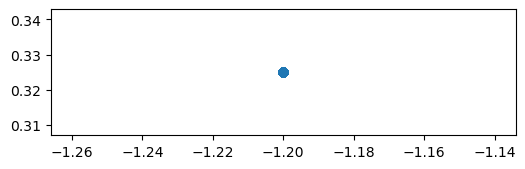

In [16]:
client = RemoteAPIClient() 
sim = client.require('sim') 
sim.setStepping(True) 

# Parar a simulação se estiver executando
initial_sim_state = sim.getSimulationState()
if initial_sim_state != 0:
    sim.stopSimulation()
    time.sleep(1)

objectPath = '/Bill'
objectHandle = sim.getObject(objectPath)   

hist = []
    
sim.startSimulation() 
while (t := sim.getSimulationTime()) < 20: 
    print(f'Simulation time: {t:.2f} [s]')
    
    position = sim.getObjectPosition(objectHandle, sim.handle_world)
    print('Pos: ', position)
    
    orientation = sim.getObjectOrientation(objectHandle, sim.handle_world)
    print('Ori: ', orientation)
    
    hist.append([position[0], position[1]])
    
    sim.step()
    
sim.stopSimulation()

fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

x, y = zip(*hist)
ax.scatter(x, y)